In [ ]:
# Import Dataset 
from sklearn.datasets import load_iris
data = load_iris()

In [ ]:
data

{'DESCR': '.. _iris_dataset:\n\nIris plants dataset\n--------------------\n\n**Data Set Characteristics:**\n\n    :Number of Instances: 150 (50 in each of three classes)\n    :Number of Attributes: 4 numeric, predictive attributes and the class\n    :Attribute Information:\n        - sepal length in cm\n        - sepal width in cm\n        - petal length in cm\n        - petal width in cm\n        - class:\n                - Iris-Setosa\n                - Iris-Versicolour\n                - Iris-Virginica\n                \n    :Summary Statistics:\n\n    ============== ==== ==== ======= ===== ====================\n                    Min  Max   Mean    SD   Class Correlation\n    ============== ==== ==== ======= ===== ====================\n    sepal length:   4.3  7.9   5.84   0.83    0.7826\n    sepal width:    2.0  4.4   3.05   0.43   -0.4194\n    petal length:   1.0  6.9   3.76   1.76    0.9490  (high!)\n    petal width:    0.1  2.5   1.20   0.76    0.9565  (high!)\n    ===========

In [ ]:
# getting the data description 
print(data.DESCR)

.. _iris_dataset:

Iris plants dataset
--------------------

**Data Set Characteristics:**

    :Number of Instances: 150 (50 in each of three classes)
    :Number of Attributes: 4 numeric, predictive attributes and the class
    :Attribute Information:
        - sepal length in cm
        - sepal width in cm
        - petal length in cm
        - petal width in cm
        - class:
                - Iris-Setosa
                - Iris-Versicolour
                - Iris-Virginica
                
    :Summary Statistics:

    ============== ==== ==== ======= ===== ====================
                    Min  Max   Mean    SD   Class Correlation
    ============== ==== ==== ======= ===== ====================
    sepal length:   4.3  7.9   5.84   0.83    0.7826
    sepal width:    2.0  4.4   3.05   0.43   -0.4194
    petal length:   1.0  6.9   3.76   1.76    0.9490  (high!)
    petal width:    0.1  2.5   1.20   0.76    0.9565  (high!)
    ============== ==== ==== ======= ===== ===========

In [ ]:
X = data.data # independent data 
Y = data.target # dependent data 

Train - Test Split 

In [ ]:
from sklearn.model_selection import train_test_split 
Xtrn,Xtst,Ytrn,Ytst = train_test_split(X,Y,train_size = 0.8, random_state = 10)

In [ ]:
print(Xtrn.shape)
print(Ytrn.shape)
print(Xtst.shape)
print(Ytst.shape)

(120, 4)
(120,)
(30, 4)
(30,)


Selecting Value of K

In [ ]:
import numpy as np 
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics 
error = [] # to store rmse values for different k 
for K in range(20):
  K = K + 1
  model = KNeighborsClassifier(n_neighbors = K ) 

  model.fit(Xtrn,Ytrn) #fit the model 
  pred =  model.predict(Xtst) # make the prediction on test set 
  error.append(np.mean(pred != Ytst)) # calculate error and append 
  print('Error value for k = ' , K , 'is :', np.min(error))

Error value for k =  1 is : 0.03333333333333333
Error value for k =  2 is : 0.03333333333333333
Error value for k =  3 is : 0.03333333333333333
Error value for k =  4 is : 0.03333333333333333
Error value for k =  5 is : 0.03333333333333333
Error value for k =  6 is : 0.03333333333333333
Error value for k =  7 is : 0.03333333333333333
Error value for k =  8 is : 0.0
Error value for k =  9 is : 0.0
Error value for k =  10 is : 0.0
Error value for k =  11 is : 0.0
Error value for k =  12 is : 0.0
Error value for k =  13 is : 0.0
Error value for k =  14 is : 0.0
Error value for k =  15 is : 0.0
Error value for k =  16 is : 0.0
Error value for k =  17 is : 0.0
Error value for k =  18 is : 0.0
Error value for k =  19 is : 0.0
Error value for k =  20 is : 0.0


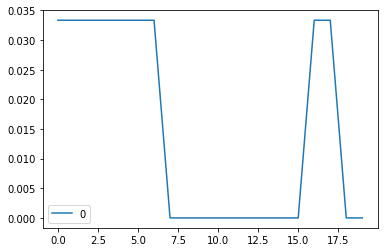

In [ ]:
   # plotting the rmse values against k values 
   import pandas as pd 
   curve = pd.DataFrame(error) # elbow curve 
   curve.plot()

Training KNN Classifier

In [ ]:
# from sklearn.neighbors import KNeighborsClassifier 

In [ ]:
model = KNeighborsClassifier(n_neighbors = 8)

In [ ]:
model.fit(Xtrn,Ytrn)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=8, p=2,
                     weights='uniform')

Evaluation of Model

In [ ]:
Ypred = model.predict(Xtst)

In [ ]:
print(Ytst)
print(Ypred)

[1 2 0 1 0 1 1 1 0 1 1 2 1 0 0 2 1 0 0 0 2 2 2 0 1 0 1 1 1 2]
[1 2 0 1 0 1 1 1 0 1 1 2 1 0 0 2 1 0 0 0 2 2 2 0 1 0 1 1 1 2]


Accuracy 

In [ ]:
from sklearn.metrics import accuracy_score 
acc = accuracy_score(Ytst,Ypred)
acc

1.0

Confusion Matrix

In [ ]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(Ytst,Ypred,labels=[0,1,2])
cm


array([[10,  0,  0],
       [ 0, 13,  0],
       [ 0,  0,  7]])

Recall Matrix

In [ ]:
rm = (((cm.T)/(cm.sum(axis = 1))).T)
rm

array([[1., 0., 0.],
       [0., 1., 0.],
       [0., 0., 1.]])

Precision Matrix 

In [ ]:
pm = (cm/cm.sum(axis=0))
pm

array([[1., 0., 0.],
       [0., 1., 0.],
       [0., 0., 1.]])

In [ ]:
prec = metrics.precision_score(Ytst,Ypred,average = 'macro')
print(prec)

1.0


F1 Score

In [ ]:
F1 = 2*pm*rm/(pm*rm)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: RuntimeWarning: invalid value encountered in true_divide
  """Entry point for launching an IPython kernel.


In [ ]:
F1

array([[ 2., nan, nan],
       [nan,  2., nan],
       [nan, nan,  2.]])